# Basic overview


## Hadamant and CNOT


<img src="./files/hadamant_CNOT.png" width="400" height="400">


Apply Hadamant transform for q1 (wich initial state is |0>), so:


<img src="./files/math1.png" width="400" height="400">


In [1]:
# pip install qiskit
# !pip install matplotlib
# !pip install pylatexenc
# !pip install ipywidgets

In [2]:
from qiskit import *

In [3]:
#quantum_register = QuantumRegister(2);
#classical_register = ClassicalRegister(2)
#circuit = QuantumCircuit(quantum_register, classical_register)

circuit = QuantumCircuit(2, 2) # ''' arg1: Register 2 qubits bits , arg2: Register 2 classical bits ''' 

In [4]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [5]:
%matplotlib inline

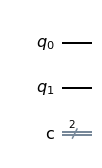

In [6]:
circuit.draw(output='mpl')

In [7]:
# hadamant gate

In [8]:
circuit.h(0)

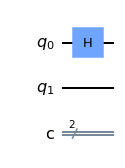

In [9]:
circuit.draw(output='mpl')

In [10]:
# CNOT gate
circuit.cx(0, 1) #-> arg0: control qubit, arg1: target qbit

In [11]:
# Mesurement
circuit.measure([0, 1], [0, 1]) # measure qubit 0 and qubit1 and associate them with the classical bit zero and bit one

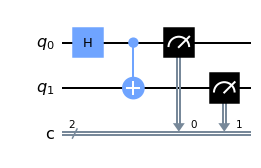

In [12]:
circuit.draw(output='mpl')

In [13]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [14]:
# check entanglement, start simulator
simulator = Aer.get_backend('qasm_simulator')

In [15]:
task = execute(circuit, backend=simulator)

In [16]:
task.result()

Result(backend_name='qasm_simulator', backend_version='0.9.1', qobj_id='be7a9617-6fcf-48ff-9a81-908d7eaf24d6', job_id='5e2c596b-6257-465a-9fe2-4173cb764f28', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 525, '0x0': 499}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-0', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=1482110223, metadata={'parallel_state_update': 12, 'noise': 'ideal', 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.005905727)], date=2021-10-15T20:06:29.053750, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_

In [17]:
from qiskit.visualization import plot_histogram

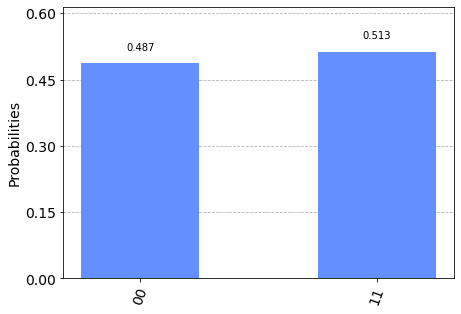

In [18]:
plot_histogram(task.result().get_counts(circuit))

In [19]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [20]:
provider = IBMQ.get_provider("ibm-q")

In [21]:
quantum_instance = provider.get_backend('ibmq_lima')

In [22]:
import qiskit.tools.jupyter
%qiskit_job_watcher

task = execute(circuit, backend=quantum_instance)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(task)

Job Status: job is queued (22)    

In [ ]:
quantum_result = task.result()
plot_histogram(quantum_result.get_counts(circuit))